# Microscopy Image Analysis

Should be run from the root directory containing separate folders with all image files for each replicate. Outputs are saved in a "outputs/" directory in the root.

Takes an image split into 4 channels (RFP, GFP, BFP and brightfield). 

Uses the YeaZ CNN model for yeast cell segmentation: https://github.com/rahi-lab/YeaZ-GUI

Outputs image files with the segmentation mask overlaid on the original bright-field image, excel files with extracted fluorescence values and statistics for each identified cell, and plots of mean fluorescence per sample.

## Imports

In [7]:
import os
import sys
sys.path.append("./unet")
sys.path.append("./disk")
sys.path.append("./utils")

from Launcher import launch_nn
from Extract import *
from SaveMask import SaveMask
import Reader as rd
from Plot import *

## User-defined variables

In [8]:
# Input folder and file names
# Assumes files were processed with the "split_and_save" ImageJ macros and all files are in the same folder
# Treats each folder as a separate replicate
folders = ["20230309_microscopy/", "20230314_microscopy/", "20230321_microscopy_4h/", "20230327_microscopy_4h/"] # must have a "/" at the end of the folder names
sample_names = ["pHLUM", "mTagBFP", "mNeonGreen", "eCitrine", "mScarletI"] # name of the raw files
colours = ['tab:gray', 'tab:blue', 'tab:green', 'tab:orange', 'tab:red'] # color associated with each sample

# Set image type: 'bf' for brightfield, 'pc' for phase-contrast
image_type = 'bf'

# Set channel names for extracted fluorescence
channel_names = ["BFP", "GFP", "RFP"]

# Set sample name to normalise fluorescence data to
control_sample = "pHLUM"

## Image Analysis

Runs the YeaZ algorithm (https://github.com/rahi-lab/YeaZ-GUI) on provided image files to identify individual yeast cells.

The segmentation file is overlaid on the original image and saved as a .png. It is recommended that a few of these images are inspected to ensure segmentation worked correctly. If it hasn't (ie areas of the image that correspond to cells are not colored by the mask, or areas of the picture that are not cells are covered by the mask) the algorithm can be tuned by changing the "min_seed_dist" or "threshold" parameters in the "launch_nn" function. Alternatively, you can use the YeaZ GUI to adjust the mask manually and save it in the analysis folder with name "<image-name>-mask.h5", and then run the fluorescence extraction portion of this notebook separately. Instructions on how to use the GUI available on github.

WARNING: depending on computing power available, the CNN can take a long time to run. The algorithm creators claim it takes about 1 minute for a ~2MB tiff image on a standard computer.

### YeaZ segmentation

In [10]:
%%time

# Process each replicate separately
for folder in folders:
    # Create outputs directory
    try:
        os.makedirs("../outputs/" + folder, exist_ok = True)
    except OSError as error:
        pass
    
    # Process each file separately
    print("Starting segmentation")
    for sample in sample_names:
        # Run CNN to predict cell segmentation and save generated mask
                
        # Setting file names
        base_path = "../" + folder + sample
        image_path = base_path + "-bright.tif"
        mask_path = base_path + "-mask"
        output_image = "../outputs/" + folder + sample + "-bright-with-mask.png" # path and name of file with generated mask

        # Launch segmentation NN
        # change min_seed_distance=5, threshold=None if needed to tune segmentation
        launch_nn(image_path, mask_path, image_type)

        # Save segmented image for inspection
        reader = rd.Reader(mask_path, mask_path, image_path)
        image = plt.imread(image_path)
        mask = reader.LoadMask(0,0)
        SaveMask(image, mask, output_image)

    print("Segmentation completed")

Starting segmentation
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:39:58,776 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:40:14,731 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:40:31,408 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:40:47,103 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:40:57,391 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Segmentation completed
Starting segmentation
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:41:17,948 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:41:35,454 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:41:50,018 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:42:02,867 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:42:16,694 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Segmentation completed
Starting segmentation
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:42:26,399 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:42:39,007 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:42:53,746 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:43:09,145 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:43:25,002 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Segmentation completed
Starting segmentation
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:43:41,143 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:43:57,336 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:44:13,023 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:44:28,999 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Running the neural network...
--------- Segmenting field of view: 0 Time point: 0


2023-05-04 16:44:42,796 WARNING CellCorrespondence: NCurrent mask exists, but no previous - returns current mask unchanged. FOV FOV0 and Time T0


--------- Finished segmenting.
Segmentation completed
CPU times: total: 25min 2s
Wall time: 5min


### Fluorescence Extraction

The file naming convention used here assumes that all image files are ".tif". The bright-field image is named "<sample name>-bright" and the fluorescence images are named "<sample name>-<channel name>" (for example "pHLUM-bright.tif", "pHLUM-BFP.tif", "pHLUM-GFP.tif", "pHLUM-RFP.tif"), and are all located in the same folder.

In [11]:
# Process each replicate separately
for folder in folders:
    # Extracted fluorescence values and stats output file
    output_xlsx = "../outputs/" + folder + "extracted_fluorescence.xlsx"

    # Start Excel file to save results
    writer = pd.ExcelWriter(output_xlsx)

    # Process each file separately
    # Load segmentation mask and extract fluorescence values
    print("Starting analysis")
    for sample in sample_names:
        # Setting file names
        base_path = "../" + folder + sample
        image_path = base_path + "-bright.tif"
        mask_path = base_path + "-mask"
        file_list = [base_path + "-BFP.tif", base_path + "-GFP.tif", base_path + "-RFP.tif"] # list of all files on which to run extraction algorithm

        # Save segmented image for inspection
        reader = rd.Reader(mask_path, mask_path, image_path)

        # Extract fluorescence values
        fluo = extract_fluo(reader, file_list, channel_names)

        # Write data to a separate sheet of the output excel file
        fluo.to_excel(writer, sheet_name = sample, index = False)

    # Save and close Excel file
    writer.close()
    print("Analysis concluded")

Starting analysis


C:\Users\maria\OneDrive - Imperial College London\Maria\Exp001_Characterise_FP_fluorescence_overflow\Microscopy\analysis_scripts\./utils\Extract.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(pc1_y / pc1_x) / (2*np.pi) * 360
C:\Users\maria\OneDrive - Imperial College London\Maria\Exp001_Characterise_FP_fluorescence_overflow\Microscopy\analysis_scripts\./utils\Extract.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(pc1_y / pc1_x) / (2*np.pi) * 360
C:\Users\maria\OneDrive - Imperial College London\Maria\Exp001_Characterise_FP_fluorescence_overflow\Microscopy\analysis_scripts\./utils\Extract.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(pc1_y / pc1_x) / (2*np.pi) * 360


Analysis concluded
Starting analysis
Analysis concluded
Starting analysis


C:\Users\maria\OneDrive - Imperial College London\Maria\Exp001_Characterise_FP_fluorescence_overflow\Microscopy\analysis_scripts\./utils\Extract.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(pc1_y / pc1_x) / (2*np.pi) * 360
C:\Users\maria\OneDrive - Imperial College London\Maria\Exp001_Characterise_FP_fluorescence_overflow\Microscopy\analysis_scripts\./utils\Extract.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(pc1_y / pc1_x) / (2*np.pi) * 360
C:\Users\maria\OneDrive - Imperial College London\Maria\Exp001_Characterise_FP_fluorescence_overflow\Microscopy\analysis_scripts\./utils\Extract.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(pc1_y / pc1_x) / (2*np.pi) * 360


Analysis concluded
Starting analysis
Analysis concluded


## Data plots

### Prepare data

In [9]:
all_data = pd.DataFrame() # empty dataframe to store data across all replicates

for i, folder in enumerate(folders):
    # Load fluorescence values file
    workbook = pd.ExcelFile("../outputs/" + folder + "extracted_fluorescence.xlsx")
    sheets = workbook.sheet_names

    # Create pandas dataframe containing data for all sheets and add extra column "Sample" with source sheet name
    df = pd.concat([pd.read_excel(workbook, sheet_name = s).assign(Sample = s) for s in sheets])
    
    # Add column storing the replicate number
    df['Replicate'] = i
    
    # Normalise fluorescence in each channel to control sample
    for channel in channel_names:
        # Get mean fluorescent (fluorescence value stored in column "Mean") for all cells in control sample
        control_mean = df[(df["Channel"] == channel) & (df["Sample"] == control_sample)]["Mean"].mean()
        
        # Normalise fluorescence to control mean and store results in new column "Normalised mean"
        df.loc[df["Channel"] == channel, "Normalised Mean"] = df.loc[df["Channel"] == channel, "Mean"].divide(control_mean)
    
    # Concat data to dataframe
    all_data = pd.concat([df, all_data])

### Plot mean intensity barplot (separate)

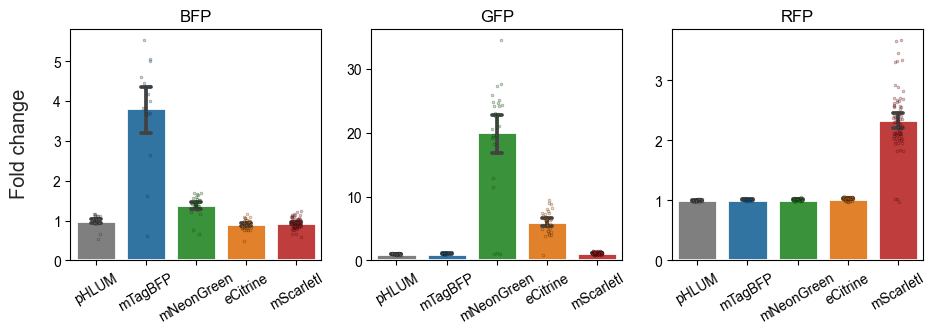

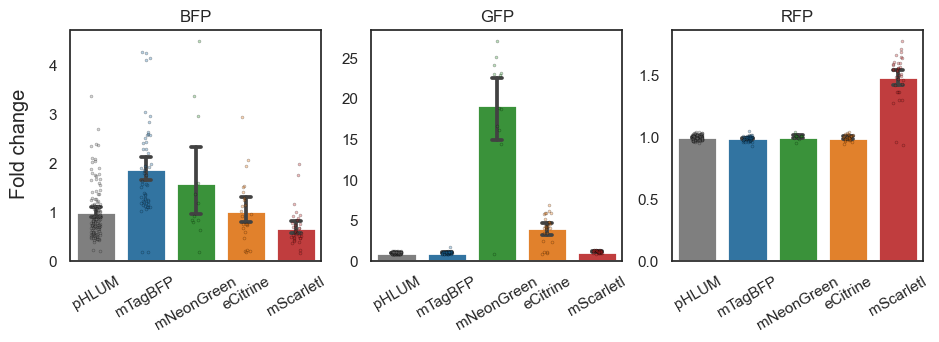

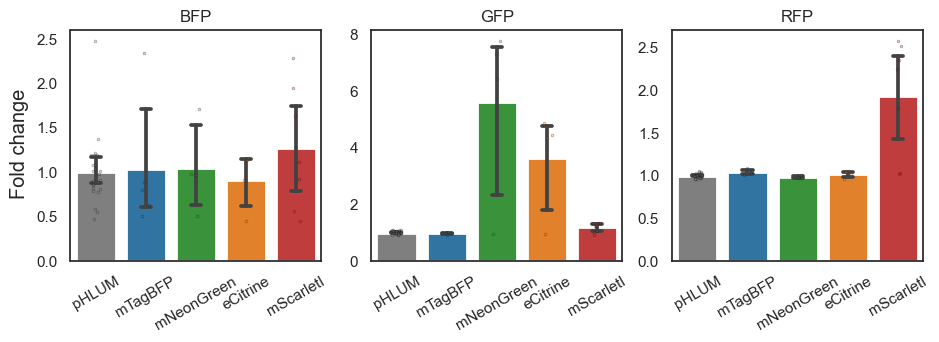

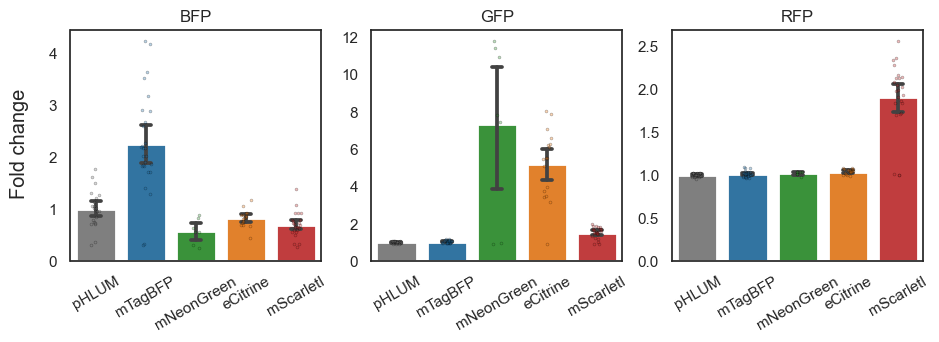

In [4]:
for i, folder in enumerate(folders):
    # Restrict data to current replicate
    df = all_data[all_data['Replicate'] == i]
    
    #Create canvas
    fig, axes = plt.subplots(1, 3, figsize=(11, 3)) # change layout if more channels to plot
    
    # Process each channel separately
    for channel, ax in zip(channel_names, axes):
        # Restrict df to channel of interest
        df_channel = df[df['Channel'] == channel]
        
        # Plot normalised fluorescence for each sample
        barplot(df_channel, "Sample", "Normalised Mean", ax, colours, 0.3)
        ax.title.set_text(channel)
           
    fig.supylabel('Fold change', x = 0.07)
    plt.savefig(f'../outputs/{folder}mean_fluorescence_barplot.png', bbox_inches='tight')

### Plot mean intensity histograms (separate)

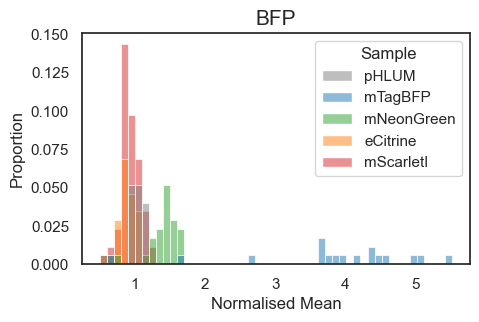

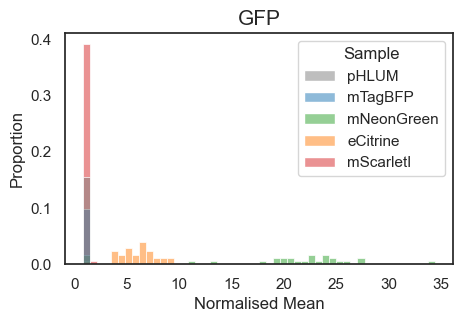

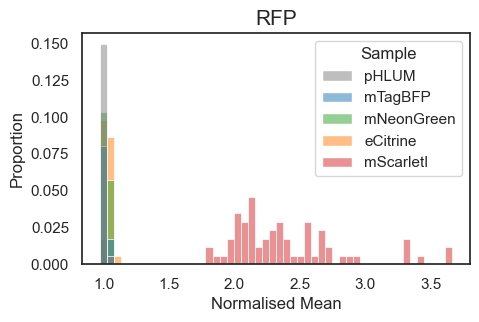

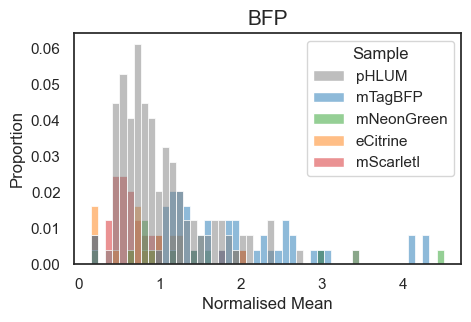

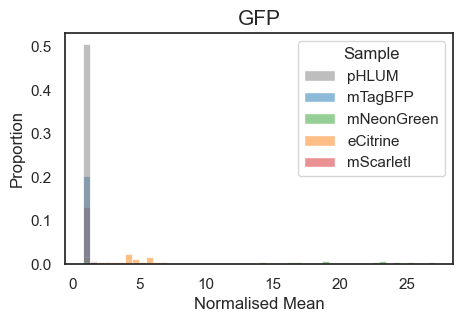

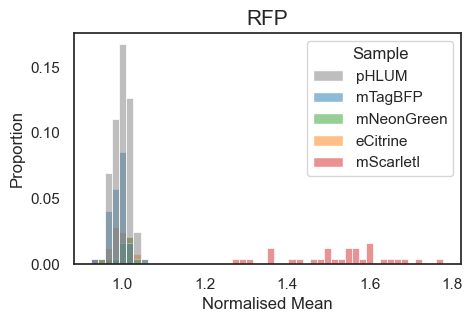

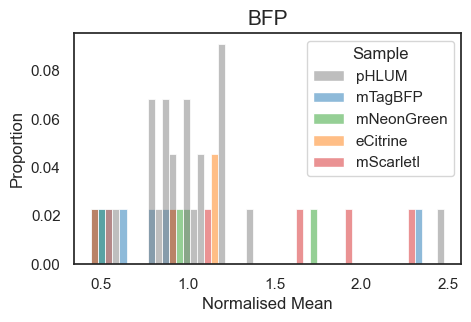

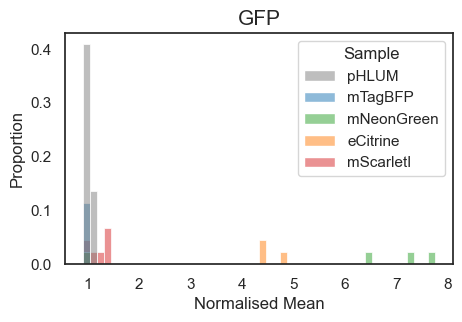

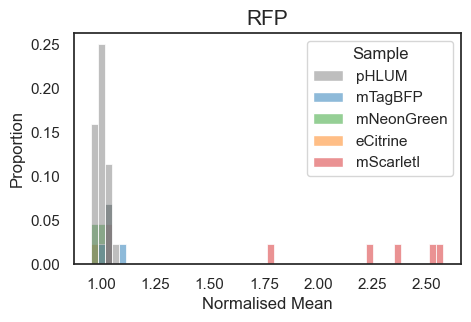

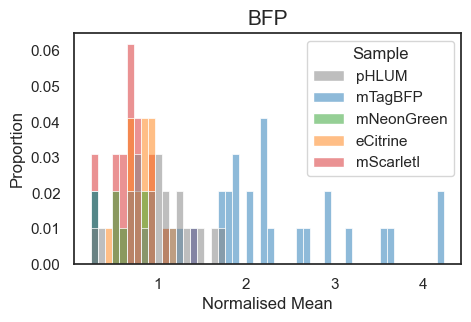

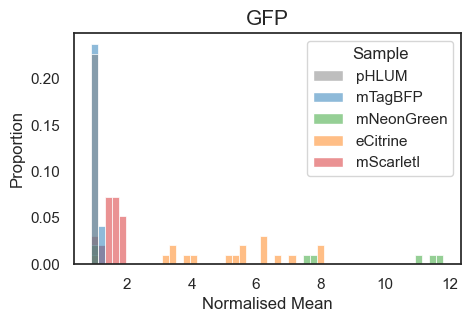

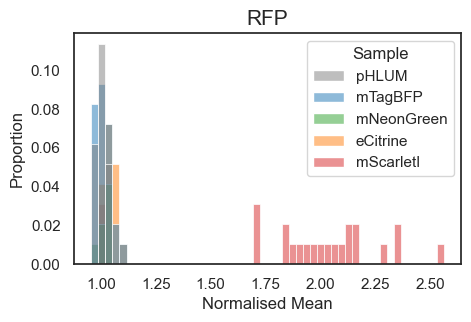

In [5]:
for i, folder in enumerate(folders):
    # Restrict data to current replicate
    df = all_data[all_data['Replicate'] == i]
    
    # Process each channel separately
    for channel in channel_names:
        # Restrict df to channel of interest
        df_channel = df[df['Channel'] == channel]
        
        fig = plt.figure(figsize=(5,3))
        sns.histplot(data=df_channel, x = 'Normalised Mean', hue = 'Sample', stat = 'proportion', bins = 50, palette = colours)
        
        plt.title(channel, fontsize=15)
        plt.savefig(f'../outputs/{folder}mean_fluorescence_{channel}_histogram.png', bbox_inches='tight')

### Plot mean intensity barplots (aggregate)

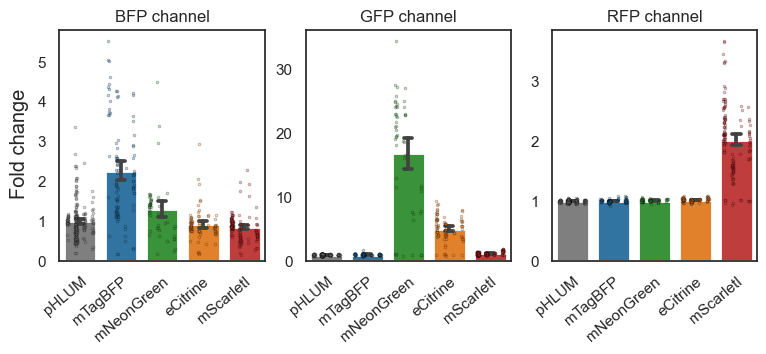

In [11]:
#Create canvas
fig, axes = plt.subplots(1, 3, figsize=(9, 3)) # change layout if more channels to plot

# Process each channel separately
for channel, ax in zip(channel_names, axes):
    # Restrict df to channel of interest
    df_channel = all_data[all_data['Channel'] == channel]

    # Plot normalised fluorescence for each sample
    barplot_aggregate(df_channel, "Sample", "Normalised Mean", ax, colours, points_alpha=0.3)
    ax.title.set_text(f'{channel} channel')

fig.supylabel('Fold change', x = 0.07)
plt.savefig(f'../outputs/all_mean_fluorescence_barplot_no_dots', bbox_inches='tight')

### Plot mean intensity boxplot (aggregate)

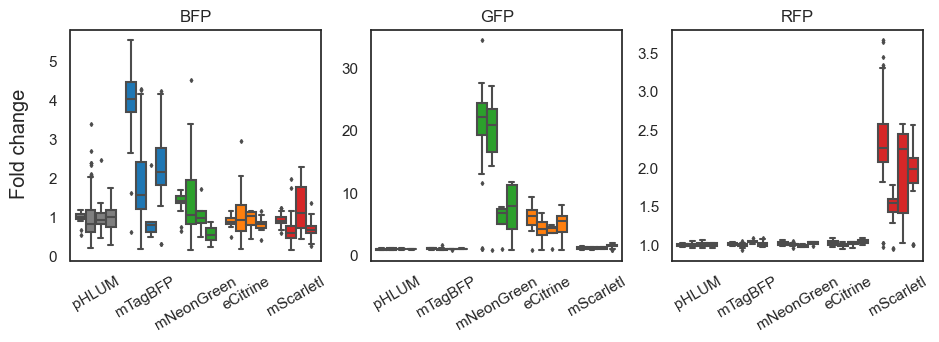

In [5]:
#Create canvas
fig, axes = plt.subplots(1, 3, figsize=(11, 3)) # change layout if more channels to plot

# Process each channel separately
for channel, ax in zip(channel_names, axes):
    # Restrict df to channel of interest
    df_channel = all_data[all_data['Channel'] == channel]
    
    # Plot normalised fluorescence for each sample
    boxplot_aggregate(df_channel, "Sample", "Normalised Mean", ax, colours)
    ax.title.set_text(channel)

fig.supylabel('Fold change', x = 0.07)
plt.savefig(f'../outputs/all_mean_fluorescence_boxplot', bbox_inches='tight')